# Validation Dataset: Last FM Dataset - Data Retrievel, Pre-Processing

### Last FM Dataset - Data Retrieval
For Validation of our project result we'll use the Last.fm dataset (Link: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset), therefore subsequently you'll find some facts about the dataset.

## About the Dataset

The **Last.fm dataset** consists of **166,153 entries** and **6 attributes**:

- **Username**: Consists of the name of the user.
- **Artist**: Name of the artists that the user had heard.
- **Track**: Consists of track/song name by that particular artist.
- **Album**: Consists of names of the albums.
- **Date**: Consists of the days ranging from January 1st to January 31st, 2021.
- **Time**: Consists of the time of a particular day when the user had heard a particular track.


In [2]:
import pandas as pd
import os

# Set the file path (update the file name accordingly if needed)
file_path = r'D:\DigiEcon\4rd Semester\5673 Data Science and AI II\Project\dataset\archive\Last.fm_data.csv'

# Check if file exists
if os.path.exists(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Display the first 5 rows
    print(df.head())
else:
    print("File not found. Please check the file name and path.")


   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


### Inspect the Lastfm Data

In [26]:
# Number of rows and columns
print("Shape of the dataset (rows, columns):", df.shape)

# Column names
print("\nColumn names:")
print(df.columns.tolist())

# Data types and non-null counts
print("\nDataFrame info:")
print(df.info())

# Show only the 'count' row from describe()
count_stats = df.describe(include='all').loc['count']
print(count_stats)


Shape of the dataset (rows, columns): (166153, 7)

Column names:
['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166153 entries, 0 to 166152
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  166153 non-null  int64 
 1   Username    166153 non-null  object
 2   Artist      166153 non-null  object
 3   Track       166153 non-null  object
 4   Album       166141 non-null  object
 5   Date        166153 non-null  object
 6   Time        166153 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.9+ MB
None
Unnamed: 0    166153.0
Username        166153
Artist          166153
Track           166153
Album           166141
Date            166153
Time            166153
Name: count, dtype: object


### Interpretation: Descriptive Statistics Summary of the Last.fm Dataset

- All columns are of type `object` (i.e., string), except for `Unnamed: 0`, which is an integer index column (likely auto-generated during CSV export).

#### 🧮 Non-Missing Values per Column:

| Column       | Non-Null Count |
|--------------|----------------|
| Unnamed: 0   | 166,153        |
| Username     | 166,153        |
| Artist       | 166,153        |
| Track        | 166,153        |
| Album        | 166,141        |
| Date         | 166,153        |
| Time         | 166,153        |

- **Missing Values**: Only the `Album` column has missing values — **12 entries** are missing album names. 
- All other fields are **fully populated**, indicating good data quality for analysis.

Note:
- As observed from the column names there is no gender specified for the artists. Therefore, some mapping from other datasets is needed. From https://zenodo.org/records/3748787 the file: lfm-360-gender.tar.gz was retrieved as it contains a json file with the musicbrainz id's (mbid). Using the data from this project on Kaggle: https://www.kaggle.com/datasets/pieca111/music-artists-popularity the gender attributes will be mapped to the artists in our data. The dataset used in this project consists of over 1.4 Million musical artists present in MusicBrainz database -- their names, tags, and popularity (listeners/scrobbles), based on data scraped from last.fm. For the purpose of this project only the mbid and the gender is retrieved. 
- The `Unnamed: 0` column will be dropped as it serves no analytical purpose.
- The `Date` and `Time` columns may be converted into `datetime` format for time-based analysis.


### Getting the gender feature for the artists - Dataset Mapping

In [ ]:
# Path to the artist metadata file containing the mbid and artists from lastfm (downloaded from Kaggle dataset)
artist_meta_path = r'D:\DigiEcon\4rd Semester\5673 Data Science and AI II\Project\dataset\gendermapping\artists.csv'

artist_meta = pd.read_csv(artist_meta_path)

# Preview to confirm structure
print(artist_meta[['mbid', 'artist_lastfm']].head())


C:\Users\patri\AppData\Local\Temp\ipykernel_18624\519892870.py:4: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  artist_meta = pd.read_csv(artist_meta_path)


                                   mbid          artist_lastfm
0  cc197bad-dc9c-440d-a5b5-d52ba2e14234               Coldplay
1  a74b1b7f-71a5-4011-9441-d0b5e4122711              Radiohead
2  8bfac288-ccc5-448d-9573-c33ea2aa5c30  Red Hot Chili Peppers
3  73e5e69d-3554-40d8-8516-00cb38737a1c                Rihanna
4  b95ce3ff-3d05-4e87-9e01-c97b66af13d4                 Eminem


In [28]:
#load the gender and mbid from the lfm-360-gender-json file for mapping

import json

gender_path = r'D:\DigiEcon\4rd Semester\5673 Data Science and AI II\Project\dataset\archive\lfm-360-gender\lfm-360-gender.json'

with open(gender_path, 'r') as f:
    gender_dict = json.load(f)

# Convert to DataFrame
gender_df = pd.DataFrame(list(gender_dict.items()), columns=['mbid', 'gender'])

# Optional: lowercase MBIDs just to be sure
gender_df['mbid'] = gender_df['mbid'].str.lower()

gender_df.head()

,mbid,gender
0,b3ae82c2-e60b-4551-a76d-6620f1b456aa,Female
1,ff6e677f-91dd-4986-a174-8db0474b1799,Male
2,8688124b-dcff-4a39-9f30-4825d445014f,Male
3,c995a379-60b9-404b-bd97-a7e2de0751d3,Male
4,0fb62639-4143-443b-8779-6867a1d08230,Female


In [8]:
# Normalize artist names in both DataFrames to lowercase for safer matching
df['Artist'] = df['Artist'].str.lower()
artist_meta['artist_lastfm'] = artist_meta['artist_lastfm'].str.lower()

# Merge df with artist_meta to get MBID
merged_step1 = pd.merge(
    df,
    artist_meta[['artist_lastfm', 'mbid']],
    how='left',
    left_on='Artist',
    right_on='artist_lastfm'
)


In [ ]:
# Merge with gender data
final_df = pd.merge(
    merged_step1,
    gender_df,
    how='left',
    on='mbid'
)

# Done! Preview the result
print(final_df[['Artist', 'mbid', 'gender']].head())
print(final_df['gender'].value_counts(dropna=False))


            Artist mbid gender
0  isobel campbell  NaN    NaN
1  isobel campbell  NaN    NaN
2  isobel campbell  NaN    NaN
3  isobel campbell  NaN    NaN
4  isobel campbell  NaN    NaN
gender
NaN       148701
Male       27720
Female     11509
Other        227
Name: count, dtype: int64


In [ ]:
Check: How Many Unique Artists Were Matched?
print("Total unique artists in Last.fm:", df['Artist'].nunique())
print("Total matched MBIDs:", merged_step1['mbid'].notna().sum())
print("Total matched genders:", final_df['gender'].notna().sum())

Total unique artists in Last.fm: 22808
Total matched MBIDs: 164553
Total matched genders: 39456


### Artist Matching

After enriching the Last.fm dataset with external metadata (MBIDs and gender), here are the results:

- **Total unique artists in Last.fm**: `22,808`
- **Total rows with matched MBIDs**: `164,553`  
  ➤ This means **99%+ of tracks** were successfully linked to an artist ID via metadata.
- **Total rows with matched gender**: `39,456`  
  ➤ Roughly **24% of the listening entries** could be assigned an artist gender.

This means while MBID coverage is excellent, gender metadata is only available for a **subset of artists**. This subset can still be very valuable for fairness analysis, but it's important to be aware of the partial coverage when interpreting results or training models.


In [ ]:
#saving the current version of the data
final_df.to_csv(r'D:\DigiEcon\4rd Semester\5673 Data Science and AI II\Project\dataset\lastfm_enriched_with_gender.csv', index=False)

### Data Pre-Processing and Exploration

In [ ]:
#clean the data - remove entries where no gender attribute could have been matched
lastfm_df = final_df[final_df['gender'].notna()]
lastfm_df.head(10)

,Unnamed: 0,Username,Artist,Track,Album,Date,Time,artist_lastfm,mbid,gender
29,30,Babs_05,billy ocean,Lovely Day (feat. YolanDa Brown & Ruti),Lovely Day (feat. YolanDa Brown & Ruti),31 Jan 2021,21:23,billy ocean,0e422e91-a42a-4b4d-8413-9baff67350f2,Male
32,33,Babs_05,bill callahan,"Arise, Therefore (feat. Six Organs of Admittance)","Arise, Therefore (feat. Six Organs of Admittance)",31 Jan 2021,21:13,bill callahan,c309d914-93af-4b3f-8058-d79c75ea89da,Male
34,35,Babs_05,rod thomas,Old Friends,Old Friends,31 Jan 2021,21:08,rod thomas,deb08150-d897-4adc-abd9-971d57a11f42,Male
35,36,Babs_05,fela kuti,I.T.T. (International Thief Thief) - Edit,I.T.T. (International Thief Thief) [Edit],31 Jan 2021,21:01,fela kuti,6514cffa-fbe0-4965-ad88-e998ead8a82a,Male
55,106,Babs_05,machel montano,Private Party,Private Party,30 Jan 2021,13:51,machel montano,cf5ffa07-4fb4-47a1-9d61-8721ae9af576,Male
72,123,Babs_05,machel montano,Private Party,Private Party,29 Jan 2021,16:45,machel montano,cf5ffa07-4fb4-47a1-9d61-8721ae9af576,Male
84,135,Babs_05,machel montano,Long Time Refix,Long Time Refix,29 Jan 2021,15:58,machel montano,cf5ffa07-4fb4-47a1-9d61-8721ae9af576,Male
97,148,Babs_05,imelda may,Just One Kiss,Just One Kiss,29 Jan 2021,15:13,imelda may,cf7560ef-7714-477e-b4cd-59de0a2d11fb,Female
100,151,Babs_05,gary bartz,Day by Day,Day by Day,31 Jan 2021,18:45,gary bartz,d2cdb3df-783b-472e-91ab-70630fc6a4ad,Male
113,159,Babs_05,fat joe,"Lean Back (feat. Lil Jon, Eminem, Mase & Remy ...",All or Nothing,31 Jan 2021,11:58,fat joe,a6a4c910-2b22-4a6f-aebe-805b176c47b8,Male


In [ ]:
#Save cleaned gender enriched lastfm dataset
lastfm_df.to_csv(r'D:\DigiEcon\4rd Semester\5673 Data Science and AI II\Project\dataset\lastfm_enriched_with_gender.csv', index=False)

### Remove this "ID-like" column as it is not needed

In [31]:
# Remove 'Unnamed: 0' column if present
if 'Unnamed: 0' in lastfm_df.columns:
    lastfm_df = lastfm_df.drop(columns=['Unnamed: 0'])

lastfm_df.head()

,Username,Artist,Track,Album,Date,Time,artist_lastfm,mbid,gender
29,Babs_05,billy ocean,Lovely Day (feat. YolanDa Brown & Ruti),Lovely Day (feat. YolanDa Brown & Ruti),31 Jan 2021,21:23,billy ocean,0e422e91-a42a-4b4d-8413-9baff67350f2,Male
32,Babs_05,bill callahan,"Arise, Therefore (feat. Six Organs of Admittance)","Arise, Therefore (feat. Six Organs of Admittance)",31 Jan 2021,21:13,bill callahan,c309d914-93af-4b3f-8058-d79c75ea89da,Male
34,Babs_05,rod thomas,Old Friends,Old Friends,31 Jan 2021,21:08,rod thomas,deb08150-d897-4adc-abd9-971d57a11f42,Male
35,Babs_05,fela kuti,I.T.T. (International Thief Thief) - Edit,I.T.T. (International Thief Thief) [Edit],31 Jan 2021,21:01,fela kuti,6514cffa-fbe0-4965-ad88-e998ead8a82a,Male
55,Babs_05,machel montano,Private Party,Private Party,30 Jan 2021,13:51,machel montano,cf5ffa07-4fb4-47a1-9d61-8721ae9af576,Male


### Check for missing values in the whole dataset

In [32]:
# Check for missing values in each column
missing_values = lastfm_df.isnull().sum()

# Print result
print("Missing values per column:")
print(missing_values)

Missing values per column:
Username         0
Artist           0
Track            0
Album            0
Date             0
Time             0
artist_lastfm    0
mbid             0
gender           0
dtype: int64


No missing values, so the data is clean.

### Check the structure for our gender enriched dataset again

In [33]:
# Number of rows and columns
print("Shape of the dataset (rows, columns):", lastfm_df.shape)

# Column names
print("\nColumn names:")
print(lastfm_df.columns.tolist())

# Data types and non-null counts
print("\nDataFrame info:")
print(lastfm_df.info())

# Show only the 'count' row from describe()
count_stats = lastfm_df.describe(include='all').loc['count']
print(count_stats)

Shape of the dataset (rows, columns): (39456, 9)

Column names:
['Username', 'Artist', 'Track', 'Album', 'Date', 'Time', 'artist_lastfm', 'mbid', 'gender']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 39456 entries, 29 to 188125
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Username       39456 non-null  object
 1   Artist         39456 non-null  object
 2   Track          39456 non-null  object
 3   Album          39456 non-null  object
 4   Date           39456 non-null  object
 5   Time           39456 non-null  object
 6   artist_lastfm  39456 non-null  object
 7   mbid           39456 non-null  object
 8   gender         39456 non-null  object
dtypes: object(9)
memory usage: 3.0+ MB
None
Username         39456
Artist           39456
Track            39456
Album            39456
Date             39456
Time             39456
artist_lastfm    39456
mbid             39456
gender           394

### Summary of Enriched Last.fm Subset with Gender 

This subset of the Last.fm dataset contains only the entries for which artist gender data could be successfully matched. Below is a detailed breakdown:


- **Shape**: `(39,456 rows, 9 columns)`

#### Column Overview

| Column          | Description                                      |
|-----------------|--------------------------------------------------|
| `Username`       | Name of the user                                 |
| `Artist`         | Artist name from the original dataset            |
| `Track`          | Track (song) name                                |
| `Album`          | Album name                                       |
| `Date`           | Date of listening (range: Jan 1–31, 2021)        |
| `Time`           | Time of the day when the track was played        |
| `artist_lastfm`  | Normalized artist name used for metadata matching |
| `mbid`           | MusicBrainz ID (unique artist identifier)        |
| `gender`         | Gender of the artist (e.g., "Male", "Female")    |

#### Data Quality

- All **39,456 entries** have **non-null values** in every column — the dataset is complete and clean.
- All columns are of type `object` (i.e., string), including `Date` and `Time`.

This subset is now suitable for gender-based analysis, bias detection, and fairness modeling.


### Explore the gender distribution

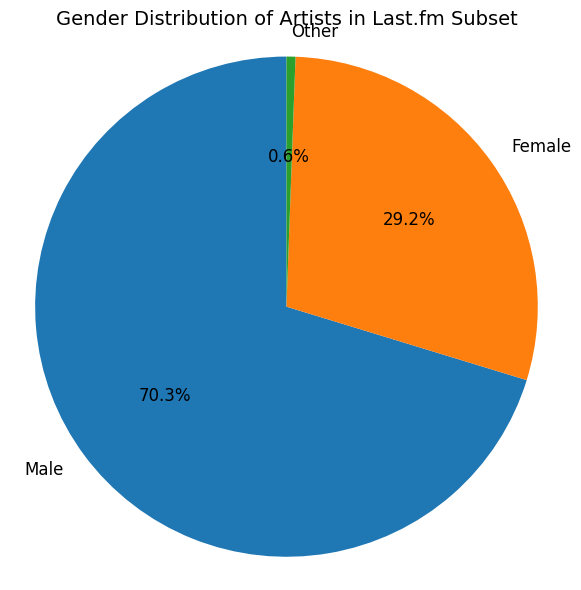

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace these counts with your actual filtered dataset if needed
gender_counts = {
    'Male': 27720,
    'Female': 11509,
    'Other': 227
}

# Convert to DataFrame
gender_df = pd.DataFrame(list(gender_counts.items()), columns=['Gender', 'Count'])

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_df['Count'],
    labels=gender_df['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Gender Distribution of Artists in Last.fm Subset', fontsize=14)
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()


### Interpretation:  Gender Distribution of Artists in the Last.fm Subset

The pie chart shows the gender distribution of artists for whom gender data was successfully matched in the Last.fm dataset:

- **Male artists** make up the majority with **70.3%** of all plays in the matched subset.
- **Female artists** account for **29.2%** of the data.
- **Other** gender represents a very small fraction (**0.6%**).

This indicates a substantial gender imbalance in the dataset — with more than two-thirds of the plays attributed to male artists. This may reflect existing gender disparities in music production, user listening behavior, or biases in artist exposure and availability.
